In [26]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("carbonDioxide.csv")

In [21]:
df.head()
cleanDF = df.dropna()

cleanDF.drop(cleanDF.columns[[0,1,5,6]], axis = 1, inplace = True)

/Users/noamhiltzik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
keys = list(cleanDF)
print(keys)

['Decimal Date', 'Carbon Dioxide (ppm)', 'Seasonally Adjusted CO2 (ppm)']


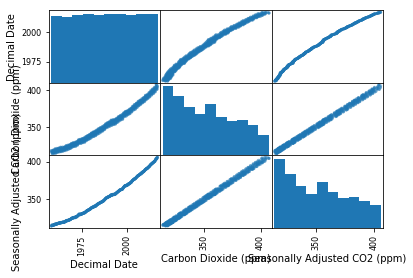

In [23]:
scatter_matrix(cleanDF)
plt.show()

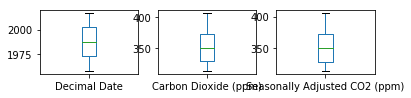

In [25]:
cleanDF.plot(kind = 'box', subplots = True, layout = (3,3),
       sharex = False, sharey = False)

plt.show()

In [32]:
decimalDateTrain = np.array(cleanDF[keys[0]][:-100])
decimalDateTest = np.array(cleanDF[keys[0]][-100:])


In [38]:
adjustedCarbonTrain = np.array(cleanDF[keys[1:]][:-100])
adjustedCarbonTest = np.array(cleanDF[keys[1:]][-100:])

In [40]:
regression = linear_model.LinearRegression()
regression.fit(adjustedCarbonTrain, decimalDateTrain )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
regression.coef_

array([-0.00751751,  0.70201876])

In [43]:
predictions = regression.predict(adjustedCarbonTest)

In [46]:
mean_squared_error(decimalDateTest, predictions)

32.404394640409848

In [47]:
r2_score(decimalDateTest, predictions)

-4.5994446451741764